<a href="https://colab.research.google.com/github/shahkaran2807/DeepCNNImageClassification2/blob/main/Deep_CNN_Image_Classifier_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

**REMOVE DODGY IMAGES**

In [ ]:
data_dir = '/content/drive/MyDrive/Deep CNN Image Classifier/data'
image_exts = ['jpeg','jpg', 'bmp', 'png']

for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

**LOAD DATA**

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)
data

Found 166 files belonging to 2 classes.


<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
tf.keras.utils.image_dataset_from_directory??

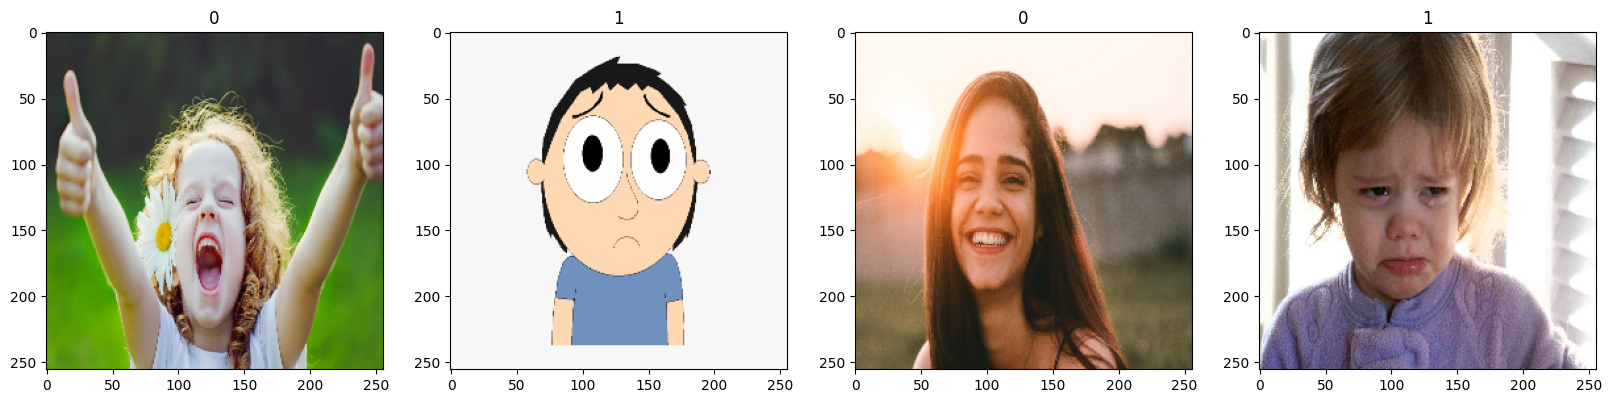

In [ ]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

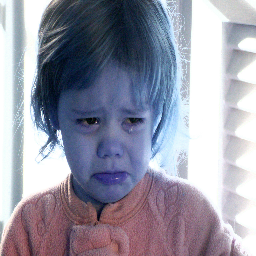

1


In [ ]:

cv2_imshow(batch[0][3])
print(batch[1][3])

# Hence 0 - Happy, 1 - Sad

**SCALE DATA (SCALING IMAGES OF (0-255) TO (0-1) BY DIVIDING THEM BY 255)**

In [ ]:
data = data.map(lambda x,y: (x/255, y))

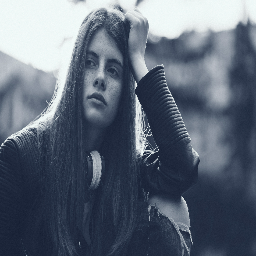

2
6


In [ ]:
cv2_imshow(data.as_numpy_iterator().next()[0][0]*255)
print(len(batch)) #batch is of len 2 as 1st are set of images and 2nd labels i.e 0 or 1
print(len(data)) #len of data is 6 i.e we have 6 batches of data, where each batch has 32 images.

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

4


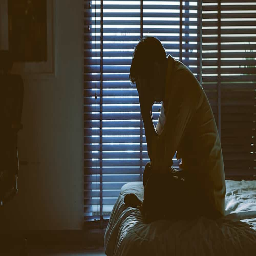

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)
print(len(train))
cv2_imshow(train.as_numpy_iterator().next()[0][0]*255)

**BUILD DEEP LEARNING MODEL**

In [ ]:
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [ ]:
logdir = '/content/drive/MyDrive/Deep CNN Image Classifier/logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir) #just logging the data of model training inside the logs file
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 24s 4s/step - loss: 1.2431 - accuracy: 0.4297 - val_loss: 0.5637 - val_accuracy: 0.6250
Epoch 2/20
4/4 [==============================] - 17s 3s/step - loss: 0.6456 - accuracy: 0.5625 - val_loss: 0.6203 - val_accuracy: 0.5625
Epoch 3/20
4/4 [==============================] - 16s 4s/step - loss: 0.5945 - accuracy: 0.5859 - val_loss: 0.4466 - val_accuracy: 0.7500
Epoch 4/20
4/4 [==============================] - 18s 4s/step - loss: 0.5592 - accuracy: 0.6094 - val_loss: 0.4371 - val_accuracy: 0.7812
Epoch 5/20
4/4 [==============================] - 18s 4s/step - loss: 0.5365 - accuracy: 0.7031 - val_loss: 0.4376 - val_accuracy: 0.7500
Epoch 6/20
4/4 [==============================] - 17s 4s/step - loss: 0.4874 - accuracy: 0.7188 - val_loss: 0.3982 - val_accuracy: 0.8125
Epoch 7/20
4/4 [==============================] - 18s 4s/step - loss: 0.4214 - accuracy: 0.8203 - val_loss: 0.3489 - val_accuracy: 0.8750
Epoch 8/20
4/4 [==================

**PLOT PERFORMANCE**

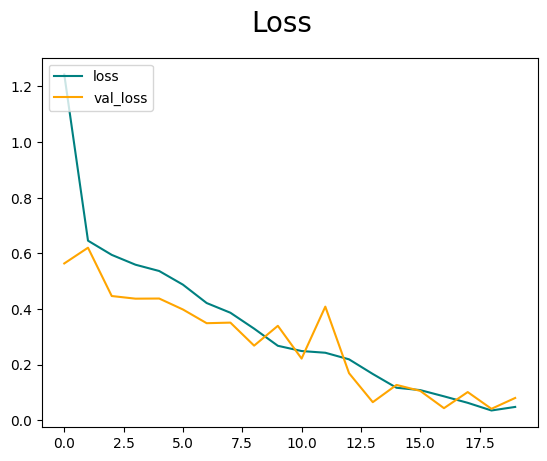

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

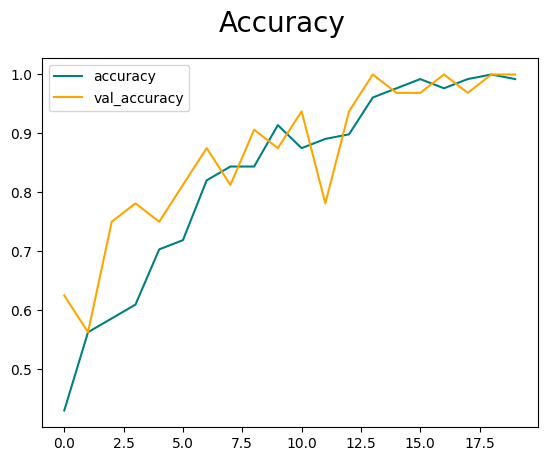

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

**EVALUATE**

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


**TESTING**

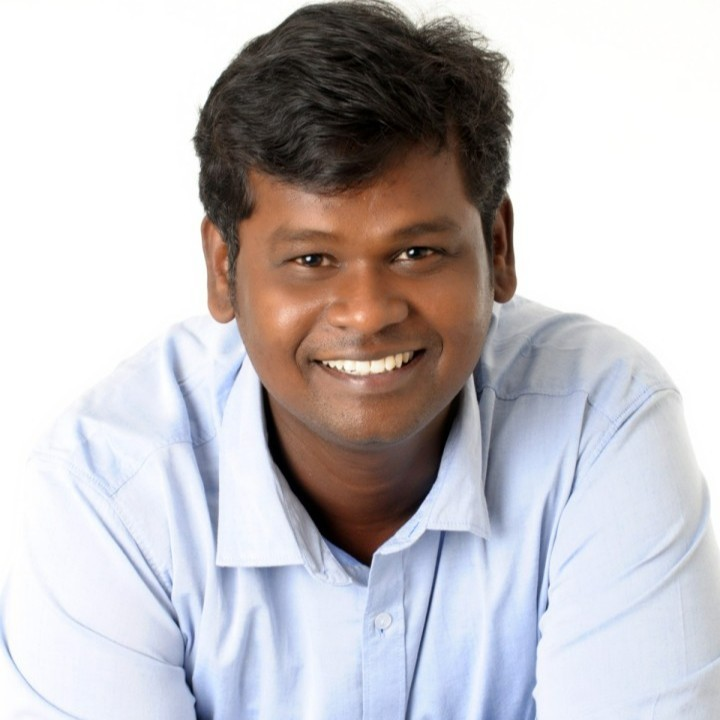

In [ ]:
img = cv2.imread('/content/happy3.jpg')
cv2_imshow(img)

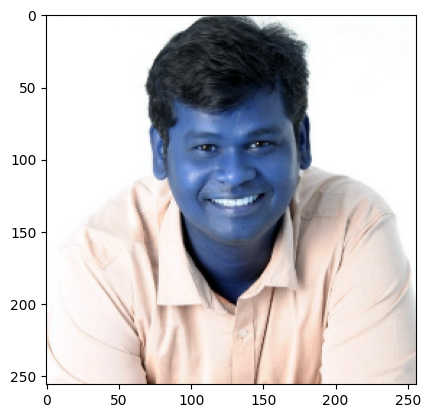

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
prediction = model.predict(np.expand_dims(resize/255, 0))
prediction

1/1 [==============================] - 0s 45ms/step


array([[0.71407443]], dtype=float32)

In [ ]:
if prediction > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


**SAVING MODEL**

In [ ]:
model.save(os.path.join('/content/drive/MyDrive/Deep CNN Image Classifier/models','imageclassifier.h5'))

In [ ]:
new_model = load_model('/content/drive/MyDrive/Deep CNN Image Classifier/models/imageclassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 372ms/step


array([[0.71407443]], dtype=float32)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
